In [1]:
# Importing Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
train = pd.read_csv('../datasets/cleaned_train_data/train_data.csv')

# DATA TRANSFORMATION PIPELINE

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# # Convert model_year To String
# train['model_year'] = train['model_year'].astype(str)

def feature_transformer(remaining_features, col_names=None, dtype_to_transform=None, scaling_method=None):
    num_features = ['model_year', 'milage', 'price']
    cat_features = ['clean_title', 'brand', 'model', 'model_year', 'fuel_type',
                    'engine', 'transmission', 'ext_col', 'int_col', 'accident']

    if dtype_to_transform == 'numerical':
        data_transform = ColumnTransformer([
            ('num_transform', scaling_method, num_features)
        ], remainder=remaining_features)
    elif dtype_to_transform == 'categorical':
        data_transform = ColumnTransformer([
            ('cat_transform', OneHotEncoder(), cat_features)
        ], remainder=remaining_features)
    else:
        data_transform = ColumnTransformer([
            ('cat_transform', OneHotEncoder(sparse_output=False), cat_features),
            ('num_transform', scaling_method, num_features)
        ], remainder=remaining_features)

    return pd.DataFrame(data_transform.fit_transform(train), columns=col_names)




# FEATURE SELECTION

### Variance Thresholding

model_year    0.044679
milage        0.055246
price         0.040937
dtype: float64


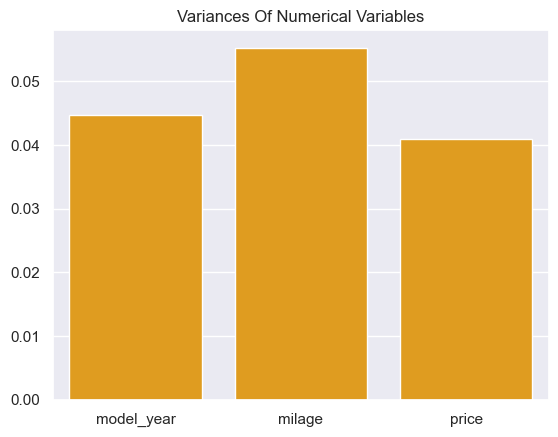

In [4]:
# Variances Of Scaled Numerical Features (milage, model_year, price)
scaledNumFeatures = feature_transformer(dtype_to_transform='numerical',
                                        remaining_features='drop',
                                        scaling_method=MinMaxScaler(), col_names=['model_year', 'milage', 'price'])

num_variances = scaledNumFeatures.var(axis=0)
print(num_variances)

# Graph
sns.barplot(num_variances, color='orange')
plt.title("Variances Of Numerical Variables")
plt.show()


In [5]:
# TRANSFORMING THE WHOLE DATASET
transformed_data = feature_transformer(remaining_features='drop', scaling_method=StandardScaler())
transformed_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,3554,3555,3556,3557,3558,3559,3560,3561,3562,3563
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.055963,-1.116294,0.752295
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.193034,-0.004490,-0.222611
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.193034,1.047533,-1.167975
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.802955,-0.625434,1.809330
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.442032,0.324886,-1.670199


In [6]:
# VARIANCES OF THE WHOLE TRANSFORMED DATA
feature_variances = transformed_data.var(axis=0)
feature_variances

0       0.000000
1       0.012522
2       0.004082
3       0.000588
4       0.064098
          ...   
3559    0.174794
3560    0.174794
3561    1.000008
3562    1.000008
3563    1.000008
Length: 3564, dtype: float64

In [7]:
# APPLYING VARIANCE THRESHOLDING
from sklearn.feature_selection import VarianceThreshold
threshold = 0.001
variance_selector = VarianceThreshold(threshold=threshold)

reduced_data = variance_selector.fit_transform(transformed_data)

In [8]:
# NUMBER OF FEATURES DROPPED
print(f"Num Of Features Before Variance Thresholding: {transformed_data.shape[1]}")
print(f"Num Of Features After Variance Thresholding: {reduced_data.shape[1]}")
print("====================================================")
print(f"Total Number Of Features Removed: {transformed_data.shape[1] - reduced_data.shape[1]}")

Num Of Features Before Variance Thresholding: 3564
Num Of Features After Variance Thresholding: 616
Total Number Of Features Removed: 2948


## X, y

In [12]:
X_train, y_train  = reduced_data[:, :-1], reduced_data[:, -1]

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.05596288, -1.11629429],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.19303433, -0.00448956],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.19303433,  1.04753287],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.05596288, -0.34818564],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.30496009, -0.8793523 ],
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.19303433, -0.07479103]])